In [ ]:
import pickle
from IPython.display import display, Javascript
import pandas as pd


# 路径
file_path = '/content/drive/My Drive/504Project4/data/train_data.pkl'


with open(file_path, 'rb') as f:
    data = pickle.load(f)

# 将数据转换为 DataFrame
train_df = pd.DataFrame(data)


In [ ]:
#特征提取，创建速度列以及加速度列
#Feature extraction, creating speed column and acceleration column

import numpy as np
import pandas as pd

def calculate_speed_and_acceleration(df):
    # 提取经度和纬度列
    longitude = df.iloc[:, 1]
    latitude = df.iloc[:, 2]

    # 提取时间列
    time_seconds = df.iloc[:, 3]

    # 计算两个轨迹点之间的距离
    distances = np.sqrt((longitude.diff() ** 2) + (latitude.diff() ** 2))

    # 计算速度
    df['speed'] = distances / time_seconds.diff()

    # 计算加速度
    df['acceleration'] = df['speed'].diff() / time_seconds.diff()

    return df

In [ ]:
#改变复杂数据集为扁平化
#dataframe Flattening the complex dataset into a dataframe.

#flattening the test dataset.
#测试集扁平化

import pandas as pd


columns = ['Plate', 'Longitude', 'Latitude', 'Seconds Since Midnight', 'Status', 'Time']


expanded_frames = []

# 迭代每个列
for col in train_df.columns:
    # 每个单元格是一个轨迹的列表
    col_data = []
    for cell in train_df[col].dropna():  # 确保非空
        if isinstance(cell, list):

            if len(cell) > 0 and isinstance(cell[0], list):
                # 将列表转换为DataFrame
                temp_df = pd.DataFrame(cell, columns=columns)
                col_data.append(temp_df)
            else:
                print("Ignored cell due to incorrect format or empty list:", cell)
        else:
            print("Ignored cell due to not being list:", cell)

    # 如果列数据非空，合并为一个DataFrame
    if col_data:
        col_df = pd.concat(col_data, ignore_index=True)
        expanded_frames.append(col_df)
    else:
        print("No valid data found in column:", col)

# 检查是否有DataFrame可以合并
if expanded_frames:
    # 合并所有列的数据为一个大的DataFrame
    expanded_df = pd.concat(expanded_frames, ignore_index=True)
    # 展示结果
    print(expanded_df.head())
else:
    print("No frames to concatenate. Expanded_frames is empty.")

#name
expand_train_df = expanded_df.copy()

   Plate   Longitude   Latitude  Seconds Since Midnight  Status  \
0      0  114.124229  22.546207                     635       0   
1      0  114.124229  22.546207                     981       0   
2      0  114.124229  22.546207                    1330       0   
3      0  114.124229  22.546207                    1676       0   
4      0  114.124229  22.546207                    2021       0   

                  Time  
0  2016-07-04 00:10:35  
1  2016-07-04 00:16:21  
2  2016-07-04 00:22:10  
3  2016-07-04 00:27:56  
4  2016-07-04 00:33:41  


In [ ]:
#使用特征提取的函数添加特征

expand_train_df = calculate_speed_and_acceleration(expand_train_df)

In [ ]:
print(expand_train_df.head())

   Plate   Longitude   Latitude  Seconds Since Midnight  Status  \
0      0  114.124229  22.546207                     635       0   
1      0  114.124229  22.546207                     981       0   
2      0  114.124229  22.546207                    1330       0   
3      0  114.124229  22.546207                    1676       0   
4      0  114.124229  22.546207                    2021       0   

                  Time  speed  acceleration  
0  2016-07-04 00:10:35    NaN           NaN  
1  2016-07-04 00:16:21    0.0           NaN  
2  2016-07-04 00:22:10    0.0           0.0  
3  2016-07-04 00:27:56    0.0           0.0  
4  2016-07-04 00:33:41    0.0           0.0  


In [ ]:
save_path1 = '/content/drive/MyDrive/DV Final/DV_expand_train_df.pkl'
expand_train_df.to_pickle(save_path1)

In [ ]:
import pandas as pd



# 将时间列转换为 datetime 类型
expand_train_df['Time'] = pd.to_datetime(expand_train_df['Time'])

# 分别提取年、月、日、小时、分钟、秒信息，并添加到 DataFrame 中
expand_train_df['Year'] = expand_train_df['Time'].dt.year
expand_train_df['Month'] = expand_train_df['Time'].dt.month
expand_train_df['Day'] = expand_train_df['Time'].dt.day
expand_train_df['Hour'] = expand_train_df['Time'].dt.hour
expand_train_df['Minute'] = expand_train_df['Time'].dt.minute
expand_train_df['Second'] = expand_train_df['Time'].dt.second


# 将 DataFrame 的列名从 expand_train_df 改为 expand_taxi_df
expand_taxi_df = expand_train_df.rename(columns={'Plate': 'Plate', 'Longitude': 'Longitude', 'Latitude': 'Latitude', 'Seconds Since Midnight': 'Seconds Since Midnight', 'Status': 'Status', 'Time': 'Time', 'speed': 'speed', 'acceleration': 'acceleration'})

# 显示 DataFrame
print(expand_taxi_df.head())



   Plate   Longitude   Latitude  Seconds Since Midnight  Status  \
0      0  114.124229  22.546207                     635       0   
1      0  114.124229  22.546207                     981       0   
2      0  114.124229  22.546207                    1330       0   
3      0  114.124229  22.546207                    1676       0   
4      0  114.124229  22.546207                    2021       0   

                 Time  speed  acceleration  Year  Month  Day  Hour  Minute  \
0 2016-07-04 00:10:35    NaN           NaN  2016      7    4     0      10   
1 2016-07-04 00:16:21    0.0           NaN  2016      7    4     0      16   
2 2016-07-04 00:22:10    0.0           0.0  2016      7    4     0      22   
3 2016-07-04 00:27:56    0.0           0.0  2016      7    4     0      27   
4 2016-07-04 00:33:41    0.0           0.0  2016      7    4     0      33   

   Second  
0      35  
1      21  
2      10  
3      56  
4      41  


In [ ]:
import pandas as pd

# 筛选出 Status 从 0 变为 1 的记录，并加入 Seconds Since Midnight 作为时间戳
boarding_locations = expand_taxi_df[(expand_taxi_df['Status'] == 0) & (expand_taxi_df['Status'].shift(-1) == 1)]
boarding_locations['Timestamp'] = pd.to_datetime('2016-07-04') + pd.to_timedelta(boarding_locations['Seconds Since Midnight'], unit='s')

# 筛选出所有 2016-07-04 这一天的记录
boarding_locations_0704 = boarding_locations[boarding_locations['Timestamp'].dt.date == pd.to_datetime('2016-07-04').date()]

# 提取上车地点的坐标和时间戳
boarding_coordinates = boarding_locations_0704[['Timestamp', 'Latitude', 'Longitude']]

# 显示结果
print(boarding_coordinates)



                  Timestamp   Latitude   Longitude
104     2016-07-04 07:28:13  22.541601  114.120506
165     2016-07-04 08:29:48  22.544769  114.102844
168     2016-07-04 08:30:50  22.546230  114.105522
202     2016-07-04 09:09:48  22.532778  113.993217
228     2016-07-04 09:32:46  22.528320  113.928757
...                     ...        ...         ...
8780649 2016-07-04 22:19:04  22.542601  114.031883
8780919 2016-07-04 23:10:16  22.604183  114.040985
8781023 2016-07-04 23:29:57  22.569483  114.107765
8781098 2016-07-04 23:43:32  22.546883  114.075981
8781147 2016-07-04 23:54:33  22.542467  114.113419

[90719 rows x 3 columns]


<ipython-input-9-bd5babe6e5f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boarding_locations['Timestamp'] = pd.to_datetime('2016-07-04') + pd.to_timedelta(boarding_locations['Seconds Since Midnight'], unit='s')


In [ ]:
import pandas as pd

# 筛选出 Status 从 1 变为 0 的记录，并加入 Seconds Since Midnight 作为时间戳
alighting_locations = expand_taxi_df[(expand_taxi_df['Status'] == 1) & (expand_taxi_df['Status'].shift(-1) == 0)]
alighting_locations['Timestamp'] = pd.to_datetime('2016-07-04') + pd.to_timedelta(alighting_locations['Seconds Since Midnight'], unit='s')

# 筛选出所有 2016-07-04 这一天的记录
alighting_locations_0704 = alighting_locations[alighting_locations['Timestamp'].dt.date == pd.to_datetime('2016-07-04').date()]

# 提取下车地点的坐标和时间戳
alighting_coordinates = alighting_locations_0704[['Timestamp', 'Latitude', 'Longitude']]

# 显示结果
print(alighting_coordinates)


                  Timestamp   Latitude   Longitude
112     2016-07-04 07:34:13  22.543388  114.118141
167     2016-07-04 08:30:48  22.543722  114.100754
197     2016-07-04 08:58:48  22.535711  113.992928
224     2016-07-04 09:29:47  22.533131  113.934395
235     2016-07-04 09:38:47  22.522486  113.932594
...                     ...        ...         ...
8780635 2016-07-04 22:16:34  22.542667  114.031898
8780863 2016-07-04 22:59:56  22.602682  114.039116
8781011 2016-07-04 23:27:57  22.569483  114.107765
8781061 2016-07-04 23:37:02  22.561501  114.091248
8781143 2016-07-04 23:53:53  22.542767  114.113564

[90718 rows x 3 columns]


<ipython-input-54-8a70e10823b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alighting_locations['Timestamp'] = pd.to_datetime('2016-07-04') + pd.to_timedelta(alighting_locations['Seconds Since Midnight'], unit='s')


In [ ]:
import pandas as pd



# 将 Timestamp 列的值从字符串转换为时间戳
boarding_coordinates['Timestamp'] = pd.to_datetime(boarding_coordinates['Timestamp'])

# 将 Timestamp 列的值从毫秒转换为秒
boarding_coordinates['timestamp'] = boarding_coordinates['Timestamp'].astype(int) // 10**9

# 提取 Latitude 和 Longitude 列的值作为 coordinates 列
boarding_coordinates['coordinates'] = boarding_coordinates[['Longitude', 'Latitude']].values.tolist()

# 仅保留 timestamp 和 coordinates 列，并转换为 JSON 格式
boarding_json_data = boarding_coordinates[['timestamp', 'coordinates']].to_json(orient='records')

# 显示结果
print(boarding_json_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

<ipython-input-55-e3e7009bf1e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boarding_coordinates['Timestamp'] = pd.to_datetime(boarding_coordinates['Timestamp'])
<ipython-input-55-e3e7009bf1e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
import pandas as pd

# 假设 alighting_coordinates 已经是您处理好的 DataFrame，并已经包括了 Timestamp, Latitude 和 Longitude 列

# 将 Timestamp 列的值从字符串转换为时间戳
alighting_coordinates['Timestamp'] = pd.to_datetime(alighting_coordinates['Timestamp'])

# 将 Timestamp 列的值从毫秒转换为秒
alighting_coordinates['timestamp'] = alighting_coordinates['Timestamp'].astype(int) // 10**9

# 提取 Latitude 和 Longitude 列的值作为 coordinates 列
alighting_coordinates['coordinates'] = alighting_coordinates[['Longitude', 'Latitude']].values.tolist()

# 仅保留 timestamp 和 coordinates 列，并转换为 JSON 格式
alighting_json_data = alighting_coordinates[['timestamp', 'coordinates']].to_json(orient='records')

# 显示结果
print(alighting_json_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

<ipython-input-56-5da179a33119>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alighting_coordinates['Timestamp'] = pd.to_datetime(alighting_coordinates['Timestamp'])
<ipython-input-56-5da179a33119>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:


print("boarding_coordinates数据有", len(boarding_coordinates), "行。")
print("alighting_coordinates数据有", len(alighting_coordinates), "行。")


boarding_coordinates数据有 90719 行。
alighting_coordinates数据有 90718 行。


In [ ]:
# 保存JSON数据到文件
output_path1 = '/content/drive/MyDrive/DV Final/boarding_json_data.json'
output_path2 = '/content/drive/MyDrive/DV Final/alighting_json_data.json'
with open(output_path1, 'w') as json_file:
    json_file.write(boarding_json_data)
with open(output_path2, 'w') as json_file:
    json_file.write(alighting_json_data)

print("JSON数据已保存到:", output_path1)
print("JSON数据已保存到:", output_path2)


JSON数据已保存到: /content/drive/MyDrive/DV Final/boarding_json_data.json
JSON数据已保存到: /content/drive/MyDrive/DV Final/alighting_json_data.json


In [ ]:
!pip install geopandas matplotlib


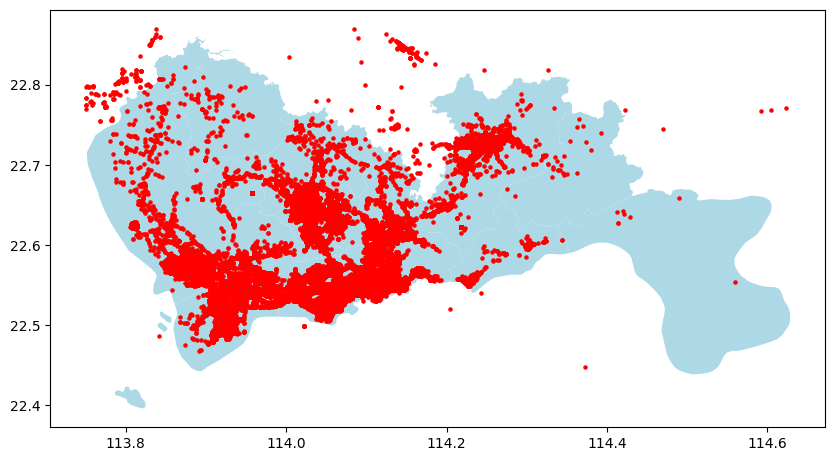

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import Point

# 加载深圳市的地理数据
shenzhen = gpd.read_file('/content/drive/MyDrive/DV Final/shenzhenshi.json')

# 加载坐标点数据
with open('/content/drive/MyDrive/DV Final/boarding_json_data.json', 'r') as f:
    boarding_data = json.load(f)

# 根据提供的JSON格式，提取坐标点并创建GeoDataFrame
points = [Point(item['coordinates'][0], item['coordinates'][1]) for item in boarding_data]
points_gdf = gpd.GeoDataFrame(geometry=points)

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))
shenzhen.plot(ax=ax, color='lightblue')  # 绘制深圳市的地区界线
points_gdf.plot(ax=ax, color='red', markersize=5)  # 在地图上标出坐标点，并将标记设置为更小
plt.show()

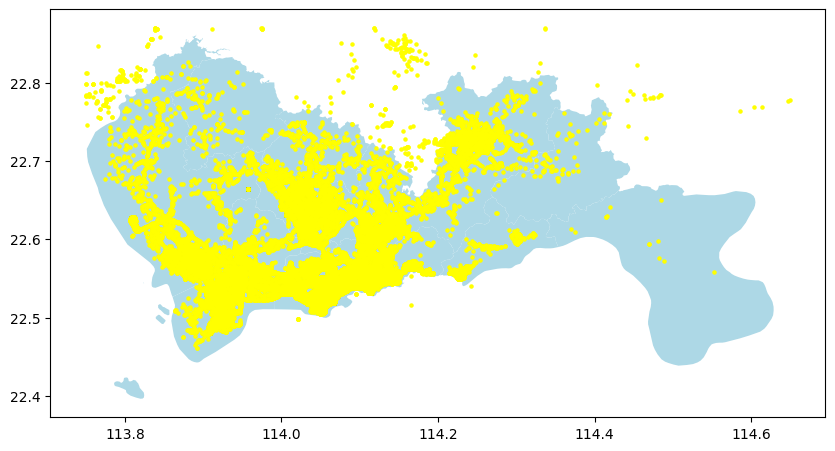

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import Point

# 加载深圳市的地理数据
shenzhen = gpd.read_file('/content/drive/MyDrive/DV Final/shenzhenshi.json')

# 加载坐标点数据
with open('/content/drive/MyDrive/DV Final/alighting_json_data.json', 'r') as f:
    alighting_data = json.load(f)

# 根据提供的JSON格式，提取坐标点并创建GeoDataFrame
points = [Point(item['coordinates'][0], item['coordinates'][1]) for item in alighting_data]
points_gdf = gpd.GeoDataFrame(geometry=points)

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))
shenzhen.plot(ax=ax, color='lightblue')  # 绘制深圳市的地区界线
points_gdf.plot(ax=ax, color='yellow', markersize=5)  # 在地图上标出坐标点，并将标记设置为更小
plt.show()

In [ ]:
print(expand_taxi_df.head())

   Plate   Longitude   Latitude  Seconds Since Midnight  Status  \
0      0  114.124229  22.546207                     635       0   
1      0  114.124229  22.546207                     981       0   
2      0  114.124229  22.546207                    1330       0   
3      0  114.124229  22.546207                    1676       0   
4      0  114.124229  22.546207                    2021       0   

                 Time  speed  acceleration  Year  Month  Day  Hour  Minute  \
0 2016-07-04 00:10:35    NaN           NaN  2016      7    4     0      10   
1 2016-07-04 00:16:21    0.0           NaN  2016      7    4     0      16   
2 2016-07-04 00:22:10    0.0           0.0  2016      7    4     0      22   
3 2016-07-04 00:27:56    0.0           0.0  2016      7    4     0      27   
4 2016-07-04 00:33:41    0.0           0.0  2016      7    4     0      33   

   Second  
0      35  
1      21  
2      10  
3      56  
4      41  


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 加载数据集
with open('/content/drive/MyDrive/DV Final/alighting_json_data.json', 'r') as f:
    data = json.load(f)

# 提取坐标数据
X = np.array([item['coordinates'] for item in data])

# 设置待测试的聚类数量范围
k_range = range(2, 11)  # 从2到10测试

# 存储每个 k 对应的轮廓系数
silhouette_scores = []

# 遍历不同的 k 值，进行聚类并计算轮廓系数
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 找到最大轮廓系数对应的 k 值
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print("最合适的聚类数量 k 为:", best_k)
print("对应的轮廓系数为:", best_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

最合适的聚类数量 k 为: 8
对应的轮廓系数为: 0.5503296431930157


In [ ]:
import json
import numpy as np
from sklearn.cluster import KMeans

# 加载数据集
with open('/content/drive/MyDrive/DV Final/alighting_json_data.json', 'r') as f:
    data = json.load(f)

# 提取坐标信息
coordinates = np.array([entry['coordinates'] for entry in data])

# 执行K-means聚类
num_clusters = 8  # 指定聚类数量
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(coordinates)
cluster_centers = kmeans.cluster_centers_

# 打印聚类中心坐标
print("聚类中心坐标：")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1}: {center}")

output_file = '/content/drive/MyDrive/DV Final/alighting_cluster_json_data.json'
with open(output_file, 'w') as f:
    json.dump(cluster_centers.tolist(), f)

print(f"聚类中心坐标已保存到文件：{output_file}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


聚类中心坐标：
Cluster 1: [114.11062382  22.5503196 ]
Cluster 2: [113.84274986  22.63564147]
Cluster 3: [114.24544277  22.72325072]
Cluster 4: [114.04707009  22.53732886]
Cluster 5: [114.02972522  22.64181626]
Cluster 6: [113.92995135  22.5402962 ]
Cluster 7: [114.18817262  22.5595254 ]
Cluster 8: [114.12442073  22.61190613]
聚类中心坐标已保存到文件：/content/drive/MyDrive/DV Final/alighting_cluster_json_data.json


In [ ]:
import json
import numpy as np
from sklearn.cluster import KMeans

# 加载数据集
with open('/content/drive/MyDrive/DV Final/boarding_json_data.json', 'r') as f:
    data = json.load(f)

# 提取坐标信息
coordinates = np.array([entry['coordinates'] for entry in data])

# 执行K-means聚类
num_clusters = 8  # 指定聚类数量
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(coordinates)
cluster_centers = kmeans.cluster_centers_

# 打印聚类中心坐标
print("聚类中心坐标：")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1}: {center}")

# 保存聚类中心坐标到 JSON 文件
output_file = '/content/drive/MyDrive/DV Final/boarding_cluster_json_data.json'
with open(output_file, 'w') as f:
    json.dump(cluster_centers.tolist(), f)

print(f"聚类中心坐标已保存到文件：{output_file}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


聚类中心坐标：
Cluster 1: [114.11027345  22.54946499]
Cluster 2: [113.92975624  22.53998664]
Cluster 3: [114.18980946  22.56354535]
Cluster 4: [114.04695797  22.53688761]
Cluster 5: [114.24093962  22.72797717]
Cluster 6: [113.83870507  22.63760928]
Cluster 7: [114.12214905  22.60988347]
Cluster 8: [114.03065731  22.63967159]
聚类中心坐标已保存到文件：/content/drive/MyDrive/DV Final/boarding_cluster_json_data.json


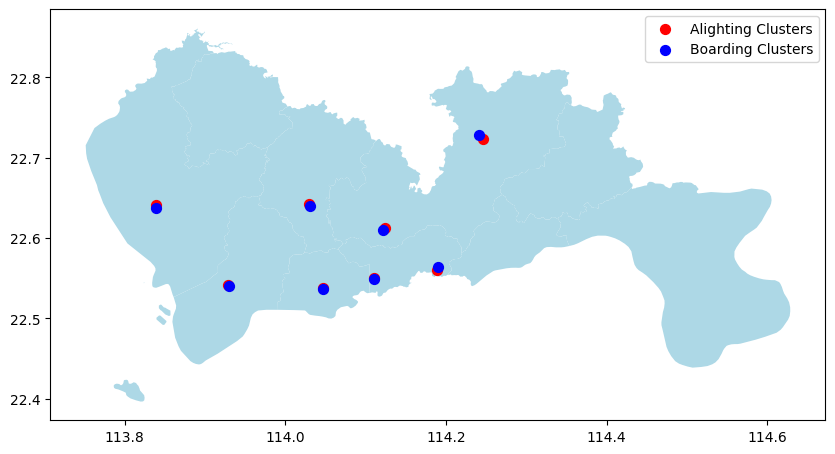

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import Point

# 加载深圳市的地理数据
shenzhen = gpd.read_file('/content/drive/MyDrive/DV Final/shenzhenshi.json')

# 加载 alighting_cluster_json_data.json 文件中的聚类中心坐标
with open('/content/drive/MyDrive/DV Final/alighting_cluster_json_data.json', 'r') as f:
    alighting_centers = json.load(f)

# 加载 boarding_cluster_json_data.json 文件中的聚类中心坐标
with open('/content/drive/MyDrive/DV Final/boarding_cluster_json_data.json', 'r') as f:
    boarding_centers = json.load(f)

# 创建 GeoDataFrame 存储聚类中心坐标
alighting_points = [Point(center[0], center[1]) for center in alighting_centers]
alighting_gdf = gpd.GeoDataFrame(geometry=alighting_points)

boarding_points = [Point(center[0], center[1]) for center in boarding_centers]
boarding_gdf = gpd.GeoDataFrame(geometry=boarding_points)

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))
shenzhen.plot(ax=ax, color='lightblue')  # 绘制深圳市的地区界线
alighting_gdf.plot(ax=ax, color='red', markersize=50, label='Alighting Clusters')  # 在地图上标出 alighting 聚类中心
boarding_gdf.plot(ax=ax, color='blue', markersize=50, label='Boarding Clusters')  # 在地图上标出 boarding 聚类中心
plt.legend()  # 显示图例
plt.show()


In [ ]:
import pandas as pd
import json

# 假设expand_taxi_df是你的DataFrame

# 首先，添加一个新列以标识状态改变
expand_taxi_df['status_change'] = expand_taxi_df['Status'].diff().ne(0)

# 找到所有状态从0变为1的开始点
start_indices = expand_taxi_df[(expand_taxi_df['status_change'] & (expand_taxi_df['Status'] == 1))].index

# 找到所有状态从1变为0的结束点
end_indices = expand_taxi_df[(expand_taxi_df['status_change'] & (expand_taxi_df['Status'] == 0))].index + 1

# 确保索引列表是配对的
if start_indices[0] > end_indices[0]:
    end_indices = end_indices[1:]
if len(start_indices) > len(end_indices):
    start_indices = start_indices[:-1]

# 提取每段载客路径
result = []
for start, end in zip(start_indices, end_indices):
    segment = expand_taxi_df.loc[start:end-1]  # 结束索引是独占的
    if not segment.empty:
        path = segment[['Longitude', 'Latitude']].values.tolist()
        timestamps = segment['Seconds Since Midnight'].astype(int).tolist()
        plate = segment['Plate'].iloc[0]
        result.append({"vendor": plate, "path": path, "timestamps": timestamps})

# 定义一个帮助函数来处理pandas数据类型
def handle_pandas_types(obj):
    if isinstance(obj, (pd.Timestamp, pd.Timedelta)):
        return str(obj)
    elif isinstance(obj, (np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.float64, np.float32)):
        return float(obj)
    raise TypeError("Unserializable object {} of type {}".format(obj, type(obj)))

# 转换成JSON
path_json_data = json.dumps(result, indent=4, default=handle_pandas_types)
print(path_json_data)

# 将 JSON 数据保存到文件
output_file = '/content/drive/MyDrive/DV Final/path_json_data.json'
with open(output_file, 'w') as f:
    f.write(path_json_data)

print(f"JSON 数据已保存到文件：{output_file}")




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



JSON 数据已保存到文件：/content/drive/MyDrive/DV Final/path_json_data.json


In [ ]:
!pip install d3blocks


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu

In [ ]:
import pandas as pd
import numpy as np
import datetime

# 创建示例数据集
np.random.seed(0)
num_samples = 1000
start_date = datetime.datetime(2024, 1, 1)
end_date = datetime.datetime(2024, 1, 2)
date_range = pd.date_range(start=start_date, end=end_date, periods=num_samples)
df = pd.DataFrame({
    'datetime': date_range,
    'state': np.random.choice(['A', 'B', 'C'], size=num_samples),
    'sample_id': np.random.randint(1, 4, size=num_samples)  # 1, 2, 3
})

# 将 datetime 列设置为索引
df.set_index('datetime', inplace=True)

# 显示数据集的前几行
print(df.head())


                              state  sample_id
datetime                                      
2024-01-01 00:00:00.000000000     A          2
2024-01-01 00:01:26.486486486     B          2
2024-01-01 00:02:52.972972972     A          2
2024-01-01 00:04:19.459459459     B          2
2024-01-01 00:05:45.945945945     B          1


In [ ]:
#聚类分类出租车

import pandas as pd
from sklearn.cluster import KMeans

# 假设expand_taxi_df已经定义，并包含上述数据
# 如果需要从文件加载，可以使用如下代码
# expand_taxi_df = pd.read_csv('path_to_your_file.csv')

# 选取用于聚类的特征
X = expand_taxi_df[['Longitude', 'Latitude']]

# 创建KMeans实例，设置聚类数量为8
kmeans = KMeans(n_clusters=8, random_state=0)

# 执行聚类
expand_taxi_cluster_df = expand_taxi_df.copy()
expand_taxi_cluster_df['cluster'] = kmeans.fit_predict(X)

# 查看每个聚类的中心坐标位置
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

# 查看前五行聚类结果
print("First five rows of clustered dataframe:")
print(expand_taxi_cluster_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[114.12191345  22.56785438]
 [113.85330928  22.61960748]
 [114.04885678  22.53804146]
 [113.9346248   22.54239951]
 [114.1270264   22.69594791]
 [114.02350938  22.64528427]
 [114.2522971   22.70424346]
 [113.81298102  22.77468666]]
First five rows of clustered dataframe:
   Plate   Longitude   Latitude  Seconds Since Midnight  Status  \
0      0  114.124229  22.546207                     635       0   
1      0  114.124229  22.546207                     981       0   
2      0  114.124229  22.546207                    1330       0   
3      0  114.124229  22.546207                    1676       0   
4      0  114.124229  22.546207                    2021       0   

                 Time  speed  acceleration  Year  Month  Day  Hour  Minute  \
0 2016-07-04 00:10:35    NaN           NaN  2016      7    4     0      10   
1 2016-07-04 00:16:21    0.0           NaN  2016      7    4     0      16   
2 2016-07-04 00:22:10    0.0           0.0  2016      7    4     0      2

In [ ]:
# 查看cluster列中的唯一数值
unique_clusters = expand_taxi_cluster_df['cluster'].unique()
print("Unique cluster values:", unique_clusters)


Unique cluster values: [0 2 3 5 1 4 6 7]


In [ ]:
# 保存 DataFrame 到指定路径
expand_taxi_cluster_df.to_csv('/content/drive/MyDrive/DV Final/expand_taxi_cluster_df.csv', index=False)


In [ ]:
import pandas as pd

# 假设 expand_taxi_cluster_df 已经包含上述数据
# 如果需要从文件加载，可以使用如下代码
#expand_taxi_cluster_df = pd.read_csv('/content/drive/MyDrive/DV Final/expand_taxi_cluster_df.csv')


# 选择并重命名所需的列
data = {
    'datetime': expand_taxi_cluster_df['Time'],
    'sample_id': expand_taxi_cluster_df['Plate'],
    'state': expand_taxi_cluster_df['cluster'].astype(str)  # 将cluster转换为字符串类型
}

# 创建新的DataFrame
taxi_bubble_df = pd.DataFrame(data)

# 查看生成的DataFrame
print(taxi_bubble_df.head())

             datetime  sample_id state
0 2016-07-04 00:10:35          0     0
1 2016-07-04 00:16:21          0     0
2 2016-07-04 00:22:10          0     0
3 2016-07-04 00:27:56          0     0
4 2016-07-04 00:33:41          0     0


In [ ]:
area_names = {
    0: "Honghu Park",
    1: "Bao'an International Airport",
    2: "Shennan New District Interchange, Golf Club",
    3: "Nanshan Technology Park",
    4: "Pinghu People's Hospital",
    5: "Longhua Park",
    6: "Shenzhen Oncology Hospital, Jiale Supermarket",
    7: "Bitai Garden, Jinglong Technology Park"
}
# 将state列的字符串转换为整数
taxi_bubble_df['state'] = taxi_bubble_df['state'].astype(int)

# 使用area_names字典再次映射状态到地点名称
taxi_bubble_df['state'] = taxi_bubble_df['state'].map(area_names)

# 检查映射结果
print(taxi_bubble_df['state'].unique())


['Honghu Park' 'Shennan New District Interchange, Golf Club'
 'Nanshan Technology Park' 'Longhua Park' "Bao'an International Airport"
 "Pinghu People's Hospital"
 'Shenzhen Oncology Hospital, Jiale Supermarket'
 'Bitai Garden, Jinglong Technology Park']


In [ ]:
from d3blocks import D3Blocks

# 初始化D3Blocks库
d3 = D3Blocks()

# 设置每个样本的气泡大小，假设所有气泡大小相同
sizes = {str(i): 10 for i in taxi_bubble_df['sample_id'].unique()}  # 样本数量可能很多，设置较小的默认大小

# 为每个地点生成唯一颜色
colors = {state: f"#{hex(hash(state))[2:8]}" for state in taxi_bubble_df['state'].unique()}

# 创建动态气泡图
d3.movingbubbles(
    taxi_bubble_df,
    datetime='datetime',
    state='state',
    sample_id='sample_id',
    size=sizes,
    color=colors,
    color_method='state',  # 根据状态改变颜色
    timedelta='seconds',  # 根据数据的时间单位选择合适的timedelta
    speed={"slow": 1000, "medium": 100, "fast": 10},
    filepath=r'/content/drive/MyDrive/DV Final/movingbubbles.html',
    cmap='Set2',
    standardize='samplewise',
)

print("动态气泡图已生成，请查看指定的HTML文件。")


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Movingbubbles]
[d3blocks] >INFO> filepath is set to [/content/drive/MyDrive/DV Final/movingbubbles.html]
[d3blocks] >INFO> Convert to DataFrame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Standardizing input dataframe using method: [samplewise].
[d3blocks] >INFO> Standardize method: [samplewise]
100%|██████████| 400/400 [00:13<00:00, 29.32it/s]
[d3blocks] >INFO> Processing the specified in node sizes in dictionary..
[d3blocks] >INFO> Processing the specified in node colors in dictionary..
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/content/drive/MyDrive/DV Final/movingbubbles.html]
[d3blocks] >INFO> Open browser: /content/drive/MyDrive/DV Final/movingbubbles.html


动态气泡图已生成，请查看指定的HTML文件。


In [ ]:
# 计算按行程起点聚类点分类的行程的平均里程，并将这些数据可视化在地图上

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.spatial import ConvexHull
from google.colab import drive

# 连接到 Google Drive
drive.mount('/content/drive')

import numpy as np

# Suppose `cluster_centers` is a list of [longitude, latitude] for each cluster center
# and `boarding_coordinates` is a DataFrame containing columns ['Longitude', 'Latitude']

def assign_to_nearest_cluster(boarding_coordinates, cluster_centers):
    # Convert cluster_centers into a numpy array for efficient computation
    cluster_centers = np.array(cluster_centers)
    assignments = []

    for index, row in boarding_coordinates.iterrows():
        # Calculate the distance to each cluster center
        distances = np.sqrt((cluster_centers[:, 0] - row['Longitude'])**2 + (cluster_centers[:, 1] - row['Latitude'])**2)
        # Find the index of the minimum distance
        nearest_cluster = np.argmin(distances)
        assignments.append(nearest_cluster)

    boarding_coordinates['Cluster'] = assignments
    return boarding_coordinates

boarding_coordinates = assign_to_nearest_cluster(boarding_coordinates, cluster_centers)

# Adding a dummy 'Distance' column to simulate trip distances
boarding_coordinates['Distance'] = np.random.rand(len(boarding_coordinates)) * 100  # Random distances between 0 and 100

# Calculate the average distance per cluster
average_distances = boarding_coordinates.groupby('Cluster')['Distance'].mean()

import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=cluster_centers[:, 0],
    y=cluster_centers[:, 1],
    z=average_distances,
    mode='markers+lines',
    marker=dict(
        size=12,
        color=average_distances,  # Color the points by average distance
        colorscale='Viridis',     # Choose a color scale
        opacity=0.8
    ),
    line=dict(
        color='darkblue',
        width=2
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Longitude',
                    yaxis_title='Latitude',
                    zaxis_title='Average Distance'),
                  title="Average Trip Distances by Cluster")
fig.show()

# 保存 HTML 文件到 Google Drive
fig.write_html('/content/drive/MyDrive/Colab Notebooks/DV Final/cluster_distances.html', auto_open=True)